# School Budget Categorization
inspired from https://campus.datacamp.com/courses/machine-learning-with-the-experts-school-budgets

Approach to a solid (or winning) answer for a competition

based on a [www.drivendata.org](https://www.drivendata.org/) competition

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (7,6)
sns.set()

In [2]:
df = pd.read_csv('data/mlcs_dcSchoolBudgetsTraining.csv',delimiter=",", thousands=',', index_col='Index')
print(df.shape)
df.head()

(1560, 25)


,Function,Use,Sharing,Reporting,Student_Type,Position_Type,Object_Type,Pre_K,Operating_Status,Object_Description,...,Sub_Object_Description,Location_Description,FTE,Function_Description,Facility_or_Department,Position_Extra,Total,Program_Description,Fund_Description,Text_1
Index,,,,,,,,,,,,,,,,,,,,,
198,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,Supplemental *,...,Non-Certificated Salaries And Wages,NaN,NaN,Care and Upkeep of Building Services,NaN,NaN,-8291.86,NaN,Title I - Disadvantaged Children/Targeted Assi...,TITLE I CARRYOVER
209,Student Transportation,NO_LABEL,Shared Services,Non-School,NO_LABEL,NO_LABEL,OtherNon-Compensation,NO_LABEL,PreK-12Operating,REPAIR AND MAINTENANCE SERVICES,...,NaN,ADMIN. SERVICES,NaN,STUDENT TRANSPORT SERVICE,NaN,NaN,618.29,PUPIL TRANSPORTATION,General Fund,NaN
750,Teacher Compensation,Instruction,School Reported,School,Unspecified,Teacher,BaseSalary/Compensation,NonPreK,PreK-12Operating,Personal Services - Teachers,...,NaN,NaN,1.0,NaN,NaN,TEACHER,49768.82,Instruction - Regular,General Purpose School,NaN
931,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,General Supplies,...,General Supplies,NaN,NaN,Instruction,Instruction And Curriculum,NaN,-1.02,"Title I, Part A Schoolwide Activities Related...",General Operating Fund,NaN
1524,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,Supplies and Materials,...,Supplies And Materials,NaN,NaN,Other Community Services *,NaN,NaN,2304.43,NaN,Title I - Disadvantaged Children/Targeted Assi...,TITLE I PI+HOMELESS


In [3]:
df1 = df

In [4]:
holdout = pd.read_csv('data/mlcs_dcSchoolBudgetsHoldout.csv',delimiter=",", thousands=',', index_col='Index')
holdout.shape

(2000, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 198 to 101861
Data columns (total 25 columns):
Function                  1560 non-null object
Use                       1560 non-null object
Sharing                   1560 non-null object
Reporting                 1560 non-null object
Student_Type              1560 non-null object
Position_Type             1560 non-null object
Object_Type               1560 non-null object
Pre_K                     1560 non-null object
Operating_Status          1560 non-null object
Object_Description        1461 non-null object
Text_2                    382 non-null object
SubFund_Description       1183 non-null object
Job_Title_Description     1131 non-null object
Text_3                    296 non-null object
Text_4                    193 non-null object
Sub_Object_Description    364 non-null object
Location_Description      874 non-null object
FTE                       449 non-null float64
Function_Description      1340 non-null object
F

In [6]:
df.columns

Index(['Function', 'Use', 'Sharing', 'Reporting', 'Student_Type',
       'Position_Type', 'Object_Type', 'Pre_K', 'Operating_Status',
       'Object_Description', 'Text_2', 'SubFund_Description',
       'Job_Title_Description', 'Text_3', 'Text_4', 'Sub_Object_Description',
       'Location_Description', 'FTE', 'Function_Description',
       'Facility_or_Department', 'Position_Extra', 'Total',
       'Program_Description', 'Fund_Description', 'Text_1'],
      dtype='object')

In [7]:
df.describe()

,FTE,Total
count,449.000000,1.542000e+03
mean,0.493532,1.446867e+04
std,0.452844,7.916751e+04
min,-0.002369,-1.044084e+06
25%,0.004310,1.108125e+02
50%,0.440000,7.060300e+02
75%,1.000000,5.347760e+03
max,1.047222,1.367500e+06


In [8]:
df.head()

,Function,Use,Sharing,Reporting,Student_Type,Position_Type,Object_Type,Pre_K,Operating_Status,Object_Description,...,Sub_Object_Description,Location_Description,FTE,Function_Description,Facility_or_Department,Position_Extra,Total,Program_Description,Fund_Description,Text_1
Index,,,,,,,,,,,,,,,,,,,,,
198,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,Supplemental *,...,Non-Certificated Salaries And Wages,NaN,NaN,Care and Upkeep of Building Services,NaN,NaN,-8291.86,NaN,Title I - Disadvantaged Children/Targeted Assi...,TITLE I CARRYOVER
209,Student Transportation,NO_LABEL,Shared Services,Non-School,NO_LABEL,NO_LABEL,OtherNon-Compensation,NO_LABEL,PreK-12Operating,REPAIR AND MAINTENANCE SERVICES,...,NaN,ADMIN. SERVICES,NaN,STUDENT TRANSPORT SERVICE,NaN,NaN,618.29,PUPIL TRANSPORTATION,General Fund,NaN
750,Teacher Compensation,Instruction,School Reported,School,Unspecified,Teacher,BaseSalary/Compensation,NonPreK,PreK-12Operating,Personal Services - Teachers,...,NaN,NaN,1.0,NaN,NaN,TEACHER,49768.82,Instruction - Regular,General Purpose School,NaN
931,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,General Supplies,...,General Supplies,NaN,NaN,Instruction,Instruction And Curriculum,NaN,-1.02,"Title I, Part A Schoolwide Activities Related...",General Operating Fund,NaN
1524,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,Supplies and Materials,...,Supplies And Materials,NaN,NaN,Other Community Services *,NaN,NaN,2304.43,NaN,Title I - Disadvantaged Children/Targeted Assi...,TITLE I PI+HOMELESS


In [9]:
# n/a got taken as NaN
df.Text_3.value_counts()

# df.FTE.value_counts()


Regular                       249
Turnaround                     25
Alternative                    14
New/Closed Schl                 4
Employee Travel                 2
Insurance Related Expenses      1
Charter                         1
Name: Text_3, dtype: int64

              FTE         Total
count  449.000000  1.542000e+03
mean     0.493532  1.446867e+04
std      0.452844  7.916751e+04
min     -0.002369 -1.044084e+06
25%      0.004310  1.108125e+02
50%      0.440000  7.060300e+02
75%      1.000000  5.347760e+03
max      1.047222  1.367500e+06


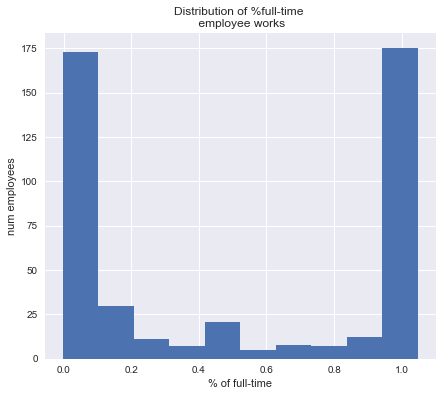

In [10]:
# Print the summary statistics
print(df.describe())

# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Create the histogram
plt.hist(df['FTE'].dropna())

# Add title and labels
plt.title('Distribution of %full-time \n employee works')
plt.xlabel('% of full-time')
plt.ylabel('num employees')

# Display the histogram
plt.show()

Nice! The high variance in expenditures makes sense (some purchases are cheap some are expensive). Also, it looks like the FTE column is bimodal. That is, there are some part-time and some full-time employees.

## 'Binary indicator' representation
`  In [4]: dummies = pd.get_dummies(sample_df[['label']], prefix_sep='_')
  In [5]: dummies.head(2)
Out[5]:
   label_a  label_b
0  1        0 
1  0        1`

In [11]:
df.dtypes.value_counts()

object     23
float64     2
dtype: int64

Yes! That's a lot of (slow) object types. Let's do some type conversion!

In [12]:
LABELS = ['Function',
 'Use',
 'Sharing',
 'Reporting',
 'Student_Type',
 'Position_Type',
 'Object_Type',
 'Pre_K',
 'Operating_Status']

In [13]:
df[LABELS].dtypes

Function            object
Use                 object
Sharing             object
Reporting           object
Student_Type        object
Position_Type       object
Object_Type         object
Pre_K               object
Operating_Status    object
dtype: object

You will notice that every label is encoded as an object datatype. Because category datatypes are much more efficient your task is to convert the labels to category types using the .astype() method.

In [14]:
# Define the lambda function: categorize_label
categorize_label = lambda x: x.astype('category')

# Convert df[LABELS] to a categorical type
df[LABELS] = df[LABELS].apply(categorize_label, axis=0)

# Print the converted dtypes
print(df[LABELS].dtypes)

Function            category
Use                 category
Sharing             category
Reporting           category
Student_Type        category
Position_Type       category
Object_Type         category
Pre_K               category
Operating_Status    category
dtype: object


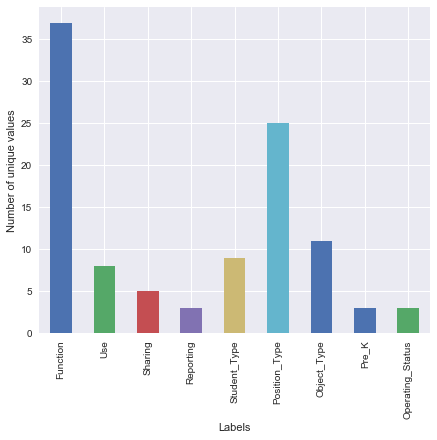

In [15]:
# Calculate number of unique values for each label: num_unique_labels
num_unique_labels = df[LABELS].apply(pd.Series.nunique)

# Plot number of unique values for each label
num_unique_labels.plot(kind='bar')

# Label the axes
plt.xlabel('Labels')
plt.ylabel('Number of unique values')

# Display the plot
plt.show()

# log loss (binary classification):

$$ logloss = - \frac{1}{N}\sum_{i=1}^N(y_ilog(p_i) + (1 - y_i)log(1-p_i))$$

Aim is to minimize logloss
Clipping is used to make sure that the log loss stays a real number
log loss is good because it rewards you for being uncertain, rather than being certain but wrong.

In [16]:
import numpy as np
def compute_log_loss(predicted, actual, eps=1e-14):
    """ Computes the logarithmic loss between predicted and
        actual when these are 1D arrays.
         :param predicted: The predicted probabilities as floats between 0-1
         :param actual: The actual binary labels. Either 0 or 1.
         :param eps (optional): log(0) is inf, so we need to offset our
    """
    predicted = np.clip(predicted, eps, 1 - eps)
    loss = -1 * np.mean(actual * np.log(predicted)
                        + (1 - actual)* np.log(1 - predicted))
    return loss

In [17]:
compute_log_loss(predicted=0.9, actual=0)

2.302585092994046

In [18]:
compute_log_loss(predicted=0.5, actual=1)

0.6931471805599453

In [19]:
print(compute_log_loss(predicted=0.85, actual=1))
print(compute_log_loss(predicted=0.99, actual=0))
print(compute_log_loss(predicted=0.51, actual=0))

0.16251892949777494
4.605170185988091
0.7133498878774648


# Exploring log loss

In [20]:
actual_labels = np.array([ 1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.])
correct_confident = np.array([ 0.95,  0.95,  0.95,  0.95,  0.95,  0.05,  0.05,  0.05,  0.05,  0.05])
correct_not_confident = np.array([ 0.65,  0.65,  0.65,  0.65,  0.65,  0.35,  0.35,  0.35,  0.35,  0.35])
wrong_not_confident = np.array([ 0.35,  0.35,  0.35,  0.35,  0.35,  0.65,  0.65,  0.65,  0.65,  0.65])
wrong_confident = np.array([ 0.05,  0.05,  0.05,  0.05,  0.05,  0.95,  0.95,  0.95,  0.95,  0.95])


In [21]:
# Compute and print log loss for 1st case
correct_confident = compute_log_loss(correct_confident, actual_labels)
print("Log loss, correct and confident: {}".format(correct_confident)) 

# Compute log loss for 2nd case
correct_not_confident = compute_log_loss(correct_not_confident, actual_labels)
print("Log loss, correct and not confident: {}".format(correct_not_confident)) 

# Compute and print log loss for 3rd case
wrong_not_confident = compute_log_loss(wrong_not_confident, actual_labels)
print("Log loss, wrong and not confident: {}".format(wrong_not_confident)) 

# Compute and print log loss for 4th case
wrong_confident = compute_log_loss(wrong_confident, actual_labels)
print("Log loss, wrong and confident: {}".format(wrong_confident)) 

# Compute and print log loss for actual labels
actual_labels = compute_log_loss(actual_labels, actual_labels)
print("Log loss, actual labels: {}".format(actual_labels))

Log loss, correct and confident: 0.05129329438755058
Log loss, correct and not confident: 0.4307829160924542
Log loss, wrong and not confident: 1.049822124498678
Log loss, wrong and confident: 2.9957322735539904
Log loss, actual labels: 9.99200722162646e-15


## Loading multicategory util for spliting test and train sets

In [22]:
from multilabel import multilabel_train_test_split

In [23]:
NUMERIC_COLUMNS = ['FTE', 'Total']

In [24]:
# Create the new DataFrame: numeric_data_only
numeric_data_only = df[NUMERIC_COLUMNS].fillna(-1000)

# Get labels and convert to dummy variables: label_dummies
label_dummies = pd.get_dummies(df[LABELS])

# Create training and test sets
X_train, X_test, y_train, y_test = multilabel_train_test_split(numeric_data_only, label_dummies, size=0.2, seed=123)

# Print the info
print("X_train info:")
print(X_train.info())
print("\nX_test info:")  
print(X_test.info())
print("\ny_train info:")  
print(y_train.info())
print("\ny_test info:")  
print(y_test.info()) 

X_train info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1040 entries, 198 to 101861
Data columns (total 2 columns):
FTE      1040 non-null float64
Total    1040 non-null float64
dtypes: float64(2)
memory usage: 24.4 KB
None

X_test info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 520 entries, 209 to 448628
Data columns (total 2 columns):
FTE      520 non-null float64
Total    520 non-null float64
dtypes: float64(2)
memory usage: 12.2 KB
None

y_train info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1040 entries, 198 to 101861
Columns: 104 entries, Function_Aides Compensation to Operating_Status_PreK-12Operating
dtypes: uint8(104)
memory usage: 113.8 KB
None

y_test info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 520 entries, 209 to 448628
Columns: 104 entries, Function_Aides Compensation to Operating_Status_PreK-12Operating
dtypes: uint8(104)
memory usage: 56.9 KB
None


/Users/alisonkline/Code/Springtime/Reference/multilabel.py:30: UserWarning: Size less than number of columns * min_count, returning 520 items instead of 312.0.
  warn(msg.format(y.shape[1] * min_count, size))


### Very first crappy model - to get up and running

In [25]:
# Import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Instantiate the classifier: clf
clf = OneVsRestClassifier(LogisticRegression())

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Print the accuracy
print("Accuracy: {}".format(clf.score(X_test, y_test)))

Accuracy: 0.0


Ok! The good news is that your workflow didn't cause any errors. The bad news is that your model scored the lowest possible accuracy: 0.0! But hey, you just threw away ALL of the text data in the budget. Later, you won't. Before you add the text data, let's see how the model does when scored by log loss.

In [26]:
holdout.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 237 to 142060
Data columns (total 16 columns):
Object_Description        1918 non-null object
Program_Description       1798 non-null object
SubFund_Description       664 non-null object
Job_Title_Description     1303 non-null object
Facility_or_Department    133 non-null object
Sub_Object_Description    1317 non-null object
Location_Description      1515 non-null object
FTE                       782 non-null float64
Function_Description      1851 non-null object
Position_Extra            594 non-null object
Text_4                    137 non-null object
Total                     1974 non-null float64
Text_2                    198 non-null object
Text_3                    216 non-null object
Fund_Description          1559 non-null object
Text_1                    627 non-null object
dtypes: float64(2), object(14)
memory usage: 265.6+ KB


In [27]:
# Instantiate the classifier: clf
clf = OneVsRestClassifier(LogisticRegression())

# Fit it to the training data
clf.fit(X_train, y_train)

# Load the holdout data: holdout - done above
# holdout = pd.read_csv('HoldoutData.csv', index_col=0)

# Generate predictions: predictions
predictions = clf.predict_proba(holdout[NUMERIC_COLUMNS].fillna(-1000))

In [28]:
# Format predictions in DataFrame: prediction_df
prediction_df1 = pd.DataFrame(columns=pd.get_dummies(df[LABELS],prefix_sep='__').columns,
                             index=holdout.index,data=predictions)

display(prediction_df1.head())

prediction_df = pd.DataFrame(columns=pd.get_dummies(df[LABELS]).columns,
                             index=holdout.index,data=predictions)
display(prediction_df.head())

# Save prediction_df to csv
prediction_df.to_csv('data/predictions.csv')

# Submit the predictions for scoring: score
#score = score_submission(pred_path='data/predictions.csv')
score = 1.9067227623381413   #From scoreing submission script/process

# Print score
print('Your model, trained with numeric data only, yields logloss score: {}'.format(score))

,Function__Aides Compensation,Function__Career & Academic Counseling,Function__Communications,Function__Curriculum Development,Function__Data Processing & Information Services,Function__Development & Fundraising,Function__Enrichment,Function__Extended Time & Tutoring,Function__Facilities & Maintenance,Function__Facilities Planning,...,Object_Type__Rent/Utilities,Object_Type__SubstituteCompensation,Object_Type__Supplies/Materials,Object_Type__Travel&Conferences,Pre_K__NO_LABEL,Pre_K__NonPreK,Pre_K__PreK,Operating_Status__Non-Operating,Operating_Status__Operating,Operating_Status__PreK-12Operating
Index,,,,,,,,,,,,,,,,,,,,,
237,0.078738,0.051591,0.023473,0.037825,0.036767,0.030503,0.045953,0.050615,0.112303,0.026714,...,0.039759,0.106849,0.144711,0.031489,0.500027,0.471727,0.093675,0.128281,0.031392,0.856131
466,0.024672,0.012990,0.008821,0.037150,0.013398,0.004973,0.035841,0.019366,0.040454,0.004951,...,0.024547,0.020690,0.109979,0.039939,0.776878,0.184400,0.036248,0.079058,0.011526,0.907521
784,0.078753,0.051596,0.023477,0.037830,0.036769,0.030509,0.045959,0.050627,0.112320,0.026720,...,0.039759,0.106880,0.144737,0.031493,0.500012,0.471737,0.093697,0.128314,0.031386,0.856105
1786,0.077957,0.051315,0.023276,0.037560,0.036692,0.030215,0.045631,0.050024,0.111437,0.026451,...,0.039762,0.105286,0.143345,0.031285,0.500813,0.471256,0.092575,0.126583,0.031695,0.857452
2643,0.024601,0.012970,0.008800,0.037079,0.013390,0.004960,0.035772,0.019302,0.040361,0.004938,...,0.024548,0.020599,0.109682,0.039869,0.777027,0.184322,0.036123,0.078753,0.011557,0.907769


,Function_Aides Compensation,Function_Career & Academic Counseling,Function_Communications,Function_Curriculum Development,Function_Data Processing & Information Services,Function_Development & Fundraising,Function_Enrichment,Function_Extended Time & Tutoring,Function_Facilities & Maintenance,Function_Facilities Planning,...,Object_Type_Rent/Utilities,Object_Type_SubstituteCompensation,Object_Type_Supplies/Materials,Object_Type_Travel&Conferences,Pre_K_NO_LABEL,Pre_K_NonPreK,Pre_K_PreK,Operating_Status_Non-Operating,Operating_Status_Operating,Operating_Status_PreK-12Operating
Index,,,,,,,,,,,,,,,,,,,,,
237,0.078738,0.051591,0.023473,0.037825,0.036767,0.030503,0.045953,0.050615,0.112303,0.026714,...,0.039759,0.106849,0.144711,0.031489,0.500027,0.471727,0.093675,0.128281,0.031392,0.856131
466,0.024672,0.012990,0.008821,0.037150,0.013398,0.004973,0.035841,0.019366,0.040454,0.004951,...,0.024547,0.020690,0.109979,0.039939,0.776878,0.184400,0.036248,0.079058,0.011526,0.907521
784,0.078753,0.051596,0.023477,0.037830,0.036769,0.030509,0.045959,0.050627,0.112320,0.026720,...,0.039759,0.106880,0.144737,0.031493,0.500012,0.471737,0.093697,0.128314,0.031386,0.856105
1786,0.077957,0.051315,0.023276,0.037560,0.036692,0.030215,0.045631,0.050024,0.111437,0.026451,...,0.039762,0.105286,0.143345,0.031285,0.500813,0.471256,0.092575,0.126583,0.031695,0.857452
2643,0.024601,0.012970,0.008800,0.037079,0.013390,0.004960,0.035772,0.019302,0.040361,0.004938,...,0.024548,0.020599,0.109682,0.039869,0.777027,0.184322,0.036123,0.078753,0.011557,0.907769


Your model, trained with numeric data only, yields logloss score: 1.9067227623381413


### Creating a bag-of-words in scikit-learn
In this exercise, you'll study the effects of tokenizing in different ways by comparing the bag-of-words representations resulting from different token patterns.

You will focus on one feature only, the Position_Extra column, which describes any additional information not captured by the Position_Type label.

For example, in the Shell you can check out the budget item in row 8960 of the data using df.loc[8960]. Looking at the output reveals that this Object_Description is overtime pay. For who? The Position Type is merely "other", but the Position Extra elaborates: "BUS DRIVER". Explore the column further to see more instances. It has a lot of NaN values.

Your task is to turn the raw text in this column into a bag-of-words representation by creating tokens that contain only alphanumeric characters.

For comparison purposes, the first 15 tokens of vec_basic, which splits df.Position_Extra into tokens when it encounters only whitespace characters, have been printed along with the length of the representation.

In [31]:
df.iloc[2,:]
df.loc[8960]
# df.loc[df['Unnamed: 0'] == 8960]  #when index was an un-named first column

Function                                         Student Transportation
Use                                                                 O&M
Sharing                                                 Shared Services
Reporting                                                    Non-School
Student_Type                                                Unspecified
Position_Type                                                     Other
Object_Type                                   OtherCompensation/Stipend
Pre_K                                                           NonPreK
Operating_Status                                       PreK-12Operating
Object_Description        Extra Duty Pay/Overtime For Support Personnel
Text_2                                                              NaN
SubFund_Description                                          Operations
Job_Title_Description                     TRANSPORTATION,BUS DR., RADIO
Text_3                                                          

In [32]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

# Fill missing values in df.Position_Extra
df.Position_Extra.fillna('', inplace=True)

# Instantiate the CountVectorizer: vec_alphanumeric
vec_alphanumeric = CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC)

# Fit to the data
vec_alphanumeric.fit(df.Position_Extra)

# Print the number of tokens and first 15 tokens
msg = "There are {} tokens in Position_Extra if we split on non-alpha numeric"
print(msg.format(len(vec_alphanumeric.get_feature_names())))
print(vec_alphanumeric.get_feature_names()[:15])

There are 110 tokens in Position_Extra if we split on non-alpha numeric
['1st', '2nd', '3rd', 'a', 'ab', 'additional', 'adm', 'administrative', 'and', 'any', 'assessment', 'assistant', 'asst', 'athletic', 'avg']


Official output:

    There are 123 tokens in Position_Extra if we split on non-alpha numeric
    ['1st', '2nd', '3rd', 'a', 'ab', 'additional', 'adm', 'administrative', 'and', 'any', 'art', 'assessment', 'assistant', 'asst', 'athletic']

### Combining text columns for tokenization
In order to get a bag-of-words representation for all of the text data in our DataFrame, you must first convert the text data in each row of the DataFrame into a single string.

In the previous exercise, this wasn't necessary because you only looked at one column of data, so each row was already just a single string. CountVectorizer expects each row to just be a single string, so in order to use all of the text columns, you'll need a method to turn a list of strings into a single string.

In this exercise, you'll complete the function definition combine_text_columns(). When completed, this function will convert all training text data in your DataFrame to a single string per row that can be passed to the vectorizer object and made into a bag-of-words using the .fit_transform() method.

In [33]:
# Define combine_text_columns()
def combine_text_columns(data_frame, to_drop=NUMERIC_COLUMNS + LABELS):
    """ converts all text in each row of data_frame to single vector """
    
    # Drop non-text columns that are in the df
    to_drop = set(to_drop) & set(data_frame.columns.tolist())
    text_data = data_frame.drop(to_drop, axis=1)
    
    # Replace nans with blanks
    text_data.fillna("", inplace=True)
    
    # Join all text items in a row that have a space in between
    return text_data.apply(lambda x: " ".join(x), axis=1)

In [34]:
# Import the CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create the basic token pattern
TOKENS_BASIC = '\\S+(?=\\s+)'

# Create the alphanumeric token pattern
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

# Instantiate basic CountVectorizer: vec_basic
vec_basic = CountVectorizer(token_pattern=TOKENS_BASIC)

# Instantiate alphanumeric CountVectorizer: vec_alphanumeric
vec_alphanumeric = CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC)

# Create the text vector
text_vector = combine_text_columns(df)

# Fit and transform vec_basic
vec_basic.fit_transform(text_vector)

# Print number of tokens of vec_basic
print("There are {} tokens in the dataset".format(len(vec_basic.get_feature_names())))

# Fit and transform vec_alphanumeric
vec_alphanumeric.fit_transform(text_vector)

# Print number of tokens of vec_alphanumeric
print("There are {} alpha-numeric tokens in the dataset".format(len(vec_alphanumeric.get_feature_names())))

There are 1370 tokens in the dataset
There are 1077 alpha-numeric tokens in the dataset


Official output:

    There are 1405 tokens in the dataset
    There are 1117 alpha-numeric tokens in the dataset

# Pipelines

In [40]:
# toy data for practing pipelines
sample_df = pd.read_csv('data/mlcs_dcSchoolBudgetsSampleDF.csv',delimiter=",", index_col='index')
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 4 columns):
numeric         1000 non-null float64
text            790 non-null object
with_missing    822 non-null float64
label           1000 non-null object
dtypes: float64(2), object(2)
memory usage: 39.1+ KB


In [47]:
# Import Pipeline
from sklearn.pipeline import Pipeline

# Import other necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Split and select numeric data only, no nans 
X_train, X_test, y_train, y_test = train_test_split(sample_df[['numeric']],
                                                    pd.get_dummies(sample_df['label']), 
                                                    random_state=22)

# Instantiate Pipeline object: pl
pl = Pipeline([
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

# Fit the pipeline to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on sample data - numeric, no nans: ", accuracy)


Accuracy on sample data - numeric, no nans:  0.62


### Preprocessing numeric features
What would have happened if you had included the with 'with_missing' column in the last exercise? Without imputing missing values, the pipeline would not be happy (try it and see). So, in this exercise you'll improve your pipeline a bit by using the Imputer() imputation transformer from scikit-learn to fill in missing values in your sample data.

By default, the imputer transformer replaces NaNs with the mean value of the column. That's a good enough imputation strategy for the sample data, so you won't need to pass anything extra to the imputer.

After importing the transformer, you will edit the steps list used in the previous exercise by inserting a (name, transform) tuple. Recall that steps are processed sequentially, so make sure the new tuple encoding your preprocessing step is put in the right place.

The sample_df is in the workspace, in case you'd like to take another look. Make sure to select both numeric columns- in the previous exercise we couldn't use with_missing because we had no preprocessing step!

In [48]:
# Import the Imputer object
from sklearn.preprocessing import Imputer

# Create training and test sets using only numeric data
X_train, X_test, y_train, y_test = train_test_split(sample_df[['numeric', 'with_missing']],
                                                    pd.get_dummies(sample_df['label']), 
                                                    random_state=456)

# Insantiate Pipeline object: pl
pl = Pipeline([
        ('imp', Imputer()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

# Fit the pipeline to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on sample data - all numeric, incl nans: ", accuracy)


Accuracy on sample data - all numeric, incl nans:  0.636


### Preprocessing text features
Here, you'll perform a similar preprocessing pipeline step, only this time you'll use the text column from the sample data.

To preprocess the text, you'll turn to CountVectorizer() to generate a bag-of-words representation of the data, as in Chapter 2. Using the default arguments, add a (step, transform) tuple to the steps list in your pipeline.

Make sure you select only the text column for splitting your training and test sets.

In [50]:
# Split out only the text data
X_train, X_test, y_train, y_test = train_test_split(sample_df['text'].fillna(' '),
                                                    pd.get_dummies(sample_df['label']), 
                                                    random_state=456)

# Instantiate Pipeline object: pl
pl = Pipeline([
        ('vec', CountVectorizer()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

# Fit to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on sample data - just text data: ", accuracy)


Accuracy on sample data - just text data:  0.808


### Multiple types of processing: FunctionTransformer
The next two exercises will introduce new topics you'll need to make your pipeline truly excel.

Any step in the pipeline must be an object that implements the fit and transform methods. The FunctionTransformer creates an object with these methods out of any Python function that you pass to it. We'll use it to help select subsets of data in a way that plays nicely with pipelines.

You are working with numeric data that needs imputation, and text data that needs to be converted into a bag-of-words. You'll create functions that separate the text from the numeric variables and see how the .fit() and .transform() methods work.

In [52]:
# Import FunctionTransformer
from sklearn.preprocessing import FunctionTransformer

# Obtain the text data: get_text_data
get_text_data = FunctionTransformer(lambda x: x['text'].fillna(' '), validate=False)

# Obtain the numeric data: get_numeric_data
get_numeric_data = FunctionTransformer(lambda x: x[['numeric', 'with_missing']], validate=False)

# Fit and transform the text data: just_text_data
just_text_data = get_text_data.fit_transform(sample_df)

# Fit and transform the numeric data: just_numeric_data
just_numeric_data = get_numeric_data.fit_transform(sample_df)

# Print head to check results
print('Text Data')
print(just_text_data.head())
print('\nNumeric Data')
print(just_numeric_data.head())

Text Data
index
0           
1        foo
2    foo bar
3           
4    foo bar
Name: text, dtype: object

Numeric Data
         numeric  with_missing
index                         
0     -10.856306      4.433240
1       9.973454      4.310229
2       2.829785      2.469828
3     -15.062947      2.852981
4      -5.786003      1.826475


### Multiple types of processing: FeatureUnion
Now that you can separate text and numeric data in your pipeline, you're ready to perform separate steps on each by nesting pipelines and using FeatureUnion().

These tools will allow you to streamline all preprocessing steps for your model, even when multiple datatypes are involved. Here, for example, you don't want to impute our text data, and you don't want to create a bag-of-words with our numeric data. Instead, you want to deal with these separately and then join the results together using FeatureUnion().

In the end, you'll still have only two high-level steps in your pipeline: preprocessing and model instantiation. The difference is that the first preprocessing step actually consists of a pipeline for numeric data and a pipeline for text data. The results of those pipelines are joined using FeatureUnion().

In [53]:
# Import FeatureUnion
from sklearn.pipeline import FeatureUnion

# Split using ALL data in sample_df
X_train, X_test, y_train, y_test = train_test_split(
    sample_df[['numeric', 'with_missing', 'text']],
               pd.get_dummies(sample_df['label']), random_state=22)

# Create a FeatureUnion with nested pipeline: process_and_join_features
process_and_join_features = FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer())
                ]))
             ]
        )

# Instantiate nested pipeline: pl
pl = Pipeline([
        ('union', process_and_join_features),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])


# Fit pl to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on sample data - all data: ", accuracy)


Accuracy on sample data - all data:  0.928


In [55]:
# alternative way to structure the same pipeline
numeric_pipeline = Pipeline([
                        ('selector', get_numeric_data),
                        ('imputer', Imputer())
                    ])
text_pipeline = Pipeline([
                        ('selector', get_text_data),
                        ('vectorizer', CountVectorizer())
                    ])
pl = Pipeline([
        ('union', FeatureUnion([
            ('numeric', numeric_pipeline),
            ('text', text_pipeline)
        ])),
        ('clf', OneVsRestClassifier(LogisticRegression())) 
    ])

# Fit pl to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on sample data - all data: ", accuracy)


Accuracy on sample data - all data:  0.928


### Using FunctionTransformer on the main dataset
In this exercise you're going to use FunctionTransformer on the primary budget data.

Recall the combine_text_columns function to select and properly format text data for tokenization - we'll need that.

Concerning the numeric data, you can use NUMERIC_COLUMNS, to help design a subset-selecting lambda function.

In [57]:
# Get the dummy encoding of the labels
dummy_labels = pd.get_dummies(df[LABELS])

# Get the columns that are features in the original df
NON_LABELS = [c for c in df.columns if c not in LABELS]

# Split into training and test sets
X_train, X_test, y_train, y_test = multilabel_train_test_split(df[NON_LABELS],
                                                               dummy_labels, 0.2, seed=123)

# Preprocess the text data: get_text_data
get_text_data = FunctionTransformer(combine_text_columns, validate=False)

# Preprocess the numeric data: get_numeric_data
get_numeric_data = FunctionTransformer(lambda x: x[NUMERIC_COLUMNS], validate=False)

/Users/alisonkline/Code/Springtime/Reference/multilabel.py:30: UserWarning: Size less than number of columns * min_count, returning 520 items instead of 312.0.
  warn(msg.format(y.shape[1] * min_count, size))


### Add a model to the pipeline
You're about to take everything you've learned so far and implement it in a Pipeline that works with the real, Driven Data budget line item data.

In [60]:
# Complete the pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer())
                ]))
             ]
        )),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

# Fit to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on budget dataset: ", accuracy)


Accuracy on budget dataset:  0.20576923076923076


### Try a different class of model
One of the great strengths of pipelines is how easy they make the process of testing different models.

We've been using the model step ('clf', OneVsRestClassifier(LogisticRegression())) 

now lets swap out the logistic-regression model and replace it with a random forest classifier, which uses the statistics of an ensemble of decision trees to generate predictions.

In [61]:
# Import random forest classifer
from sklearn.ensemble import RandomForestClassifier

# Edit model step in pipeline
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer())
                ]))
             ]
        )),
        ('clf', RandomForestClassifier())
    ])

# Fit to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on budget dataset: ", accuracy)


Accuracy on budget dataset:  0.28076923076923077


In [62]:
# Add model step to pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer())
                ]))
             ]
        )),
        ('clf', RandomForestClassifier(n_estimators=15))
    ])

# Fit to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on budget dataset: ", accuracy)


Accuracy on budget dataset:  0.3211538461538462


### Deciding what's a word
Lets look a little deeper into how the text features will be processed.

Use CountVectorizer on the training data X_train to see the effect of tokenization on punctuation.

Since CountVectorizer expects a vector, you use combine_text_columns before fitting to the training data.

In [64]:
# Create the text vector
text_vector = combine_text_columns(X_train)

# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

# Instantiate the CountVectorizer: text_features
text_features = CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC)

# Fit text_features to the text vector
text_features.fit(text_vector)

# Print the first 10 tokens
print(text_features.get_feature_names()[:10])

['12', '1st', '2nd', '4th', '5th', '70h', '8', 'a', 'ab', 'acad']


### N-gram range in scikit-learn
In this exercise you'll insert a CountVectorizer instance into your pipeline for the main dataset, and compute multiple n-gram features to be used in the model.

In order to look for ngram relationships at multiple scales, you will use the ngram_range parameter.

Special functions: You'll notice a couple of new steps provided in the pipeline in this and many of the remaining exercises. Specifically, the dim_red step following the vectorizer step , and the scale step preceeding the clf (classification) step.

These have been added in order to account for the fact that you're using a reduced-size sample of the full dataset in this course. To make sure the models perform as the expert competition winner intended, we have to apply a dimensionality reduction technique, which is what the dim_red step does, and we have to scale the features to lie between -1 and 1, which is what the scale step does.

The dim_red step uses a scikit-learn function called SelectKBest(), applying something called the chi-squared test to select the K "best" features. The scale step uses a scikit-learn function called MaxAbsScaler() in order to squash the relevant features into the interval -1 to 1.

In [65]:
# Import pipeline
from sklearn.pipeline import Pipeline

# Import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Import other preprocessing modules
from sklearn.preprocessing import Imputer
from sklearn.feature_selection import chi2, SelectKBest

# Select 300 best features
chi_k = 300

# Import functional utilities
from sklearn.preprocessing import FunctionTransformer, MaxAbsScaler
from sklearn.pipeline import FeatureUnion

# Perform preprocessing
get_text_data = FunctionTransformer(combine_text_columns, validate=False)
get_numeric_data = FunctionTransformer(lambda x: x[NUMERIC_COLUMNS], validate=False)

# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

# Instantiate pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC,
                                                   ngram_range=(1,2))),
                    ('dim_red', SelectKBest(chi2, chi_k))
                ]))
             ]
        )),
        ('scale', MaxAbsScaler()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

### Implement interaction modeling in scikit-learn
It's time to add interaction features to your model. The PolynomialFeatures object in scikit-learn does just that, but here you're going to use a custom interaction object, SparseInteractions. Interaction terms are a statistical tool that lets your model express what happens if two features appear together in the same row.

SparseInteractions does the same thing as PolynomialFeatures, but it uses sparse matrices to do so. You can get the code for SparseInteractions at this [GitHub Gist](https://github.com/drivendataorg/box-plots-sklearn/blob/master/src/features/SparseInteractions.py).

In [67]:
from itertools import combinations

import numpy as np
from scipy import sparse
from sklearn.base import BaseEstimator, TransformerMixin


class SparseInteractions(BaseEstimator, TransformerMixin):
    def __init__(self, degree=2, feature_name_separator="_"):
        self.degree = degree
        self.feature_name_separator = feature_name_separator

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if not sparse.isspmatrix_csc(X):
            X = sparse.csc_matrix(X)

        if hasattr(X, "columns"):
            self.orig_col_names = X.columns
        else:
            self.orig_col_names = np.array([str(i) for i in range(X.shape[1])])

        spi = self._create_sparse_interactions(X)
        return spi

    def get_feature_names(self):
        return self.feature_names

    def _create_sparse_interactions(self, X):
        out_mat = []
        self.feature_names = self.orig_col_names.tolist()

        for sub_degree in range(2, self.degree + 1):
            for col_ixs in combinations(range(X.shape[1]), sub_degree):
                # add name for new column
                name = self.feature_name_separator.join(self.orig_col_names[list(col_ixs)])
                self.feature_names.append(name)

                # get column multiplications value
                out = X[:, col_ixs[0]]
                for j in col_ixs[1:]:
                    out = out.multiply(X[:, j])

                out_mat.append(out)

        return sparse.hstack([X] + out_mat)

PolynomialFeatures and SparseInteractions both take the argument degree, which tells them what polynomial degree of interactions to compute.

You're going to consider interaction terms of degree=2 in your pipeline. You will insert these steps after the preprocessing steps you've built out so far, but before the classifier steps.

Pipelines with interaction terms take a while to train (since you're making n features into n-squared features!), so as long as you set it up right, we'll do the heavy lifting and tell you what your score is!

In [79]:
# Instantiate pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC,
                                                   ngram_range=(1, 2))),  
                    ('dim_red', SelectKBest(chi2, chi_k))
                ]))
             ]
        )),
        ('int', SparseInteractions(degree=2)),
        ('scale', MaxAbsScaler()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

In [80]:
# Fit to the training data
pl.fit(X_train, y_train)

/Users/alisonkline/anaconda3/lib/python3.6/site-packages/sklearn/utils/__init__.py:93: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


Pipeline(memory=None,
     steps=[('union', FeatureUnion(n_jobs=1,
       transformer_list=[('numeric_features', Pipeline(memory=None,
     steps=[('selector', FunctionTransformer(accept_sparse=False,
          func=<function <lambda> at 0x10ecb0ea0>, inv_kw_args=None,
          inverse_func=None, kw_args=None, pass_y='deprec...=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          n_jobs=1))])

In [82]:
from sklearn.metrics.scorer import make_scorer
from models.metrics import multi_multi_log_loss

log_loss_scorer = make_scorer(multi_multi_log_loss)
# a version of multi_multi_log_loss is here:
# https://github.com/drivendataorg/metrics/blob/master/metrics.py

ModuleNotFoundError: No module named 'models'

In [ ]:
# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on budget dataset: ", accuracy)
# print the score of our trained pipeline on our test set
print("Logloss score of trained pipeline: ", log_loss_scorer(pl, X_test, y_test.values))

not sure how to add up the log loss - due to training delays the program just gave to answer!

Log loss score: 1.2256. Nice improvement from 1.2681!

### Implementing the hashing trick in scikit-learn
In this exercise you will check out the scikit-learn implementation of HashingVectorizer before adding it to your pipeline later.

As you saw in the video, HashingVectorizer acts just like CountVectorizer in that it can accept token_pattern and ngram_range parameters. The important difference is that it creates hash values from the text, so that we get all the computational advantages of hashing!

This exercise was implemented on a subset of the data

In [77]:
# Import HashingVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

# Get text data: text_data
text_data = combine_text_columns(X_train)

# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)' 

# Instantiate the HashingVectorizer: hashing_vec
hashing_vec = HashingVectorizer(token_pattern=TOKENS_ALPHANUMERIC)

# Fit and transform the Hashing Vectorizer
hashed_text = hashing_vec.fit_transform(text_data)

# Create DataFrame and print the head
hashed_df = pd.DataFrame(hashed_text.data)
print(hashed_df.head())

          0
0  0.164399
1 -0.493197
2 -0.328798
3  0.164399
4  0.164399


### Build the winning model
It's time to build the model that won DrivenData's competition.

You've constructed a robust, powerful pipeline capable of processing training and testing data. Now that you understand the data and know all of the tools you need, you can essentially solve the whole problem in a relatively small number of lines of code.

All you need to do is add the HashingVectorizer step to the pipeline to replace the CountVectorizer step.

The parameters non_negative=True, norm=None, and binary=False make the HashingVectorizer perform similarly to the default settings on the CountVectorizer so you can just replace one with the other.

In [78]:
# Instantiate the winning model pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', HashingVectorizer(token_pattern=TOKENS_ALPHANUMERIC,
                                                     non_negative=True, norm=None, binary=False,
                                                     ngram_range=(1,2))),
                    ('dim_red', SelectKBest(chi2, chi_k))
                ]))
             ]
        )),
        ('int', SparseInteractions(degree=2)),
        ('scale', MaxAbsScaler()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

Well done! Log loss: 1.2258. Looks like the performance is about the same, but this is expected since the HashingVectorizer should work the same as the CountVectorizer. Try this pipeline out on the whole dataset on your local machine to see its full power!

What tactics got the winner the best score?
Now you've implemented the winning model from start to finish. If you want to use this model locally, this [Jupyter notebook](https://github.com/datacamp/course-resources-ml-with-experts-budgets/blob/master/notebooks/1.0-full-model.ipynb) contains all the code you've worked so hard on. You can now take that code and build on it!

